### Name : Bhavana Ettikala
### Email Id: ettikalabhavana@gmail.com

## Basic Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score,f1_score
## import Warnings to ignore
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load The DataSet
df = pd.read_csv('/content/BankNote_Authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# Data preprocessing

In [ ]:
# Checking DataSet Shape
df.shape

(1372, 5)

In [ ]:
df.duplicated().sum()

24

In [ ]:
df.drop_duplicates(inplace=True)

## Checking Missing Values

In [ ]:
# Checking Nan Values
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [ ]:
# Checking Null values
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

As, we can see there is no missing or null values, Which is good start.

## Statistical Analysis

In [ ]:
# checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1348 non-null   float64
 1   skewness  1348 non-null   float64
 2   curtosis  1348 non-null   float64
 3   entropy   1348 non-null   float64
 4   class     1348 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 63.2 KB


In [ ]:
# checking data correlation
df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.272863,-0.387171,0.273993,-0.735185
skewness,0.272863,1.000000,-0.785376,-0.520293,-0.449835
curtosis,-0.387171,-0.785376,1.000000,0.311379,0.154376
entropy,0.273993,-0.520293,0.311379,1.000000,-0.033979
class,-0.735185,-0.449835,0.154376,-0.033979,1.000000


In [ ]:
# show summary statistics
print(df.describe())

          variance     skewness     curtosis      entropy        class
count  1348.000000  1348.000000  1348.000000  1348.000000  1348.000000
mean      0.445785     1.909039     1.413578    -1.168712     0.452522
std       2.862906     5.868600     4.328365     2.085877     0.497925
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.786650    -1.627000    -1.545600    -2.393100     0.000000
50%       0.518735     2.334150     0.605495    -0.578890     0.000000
75%       2.853250     6.796025     3.199800     0.403863     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


# EDA - Data visualization

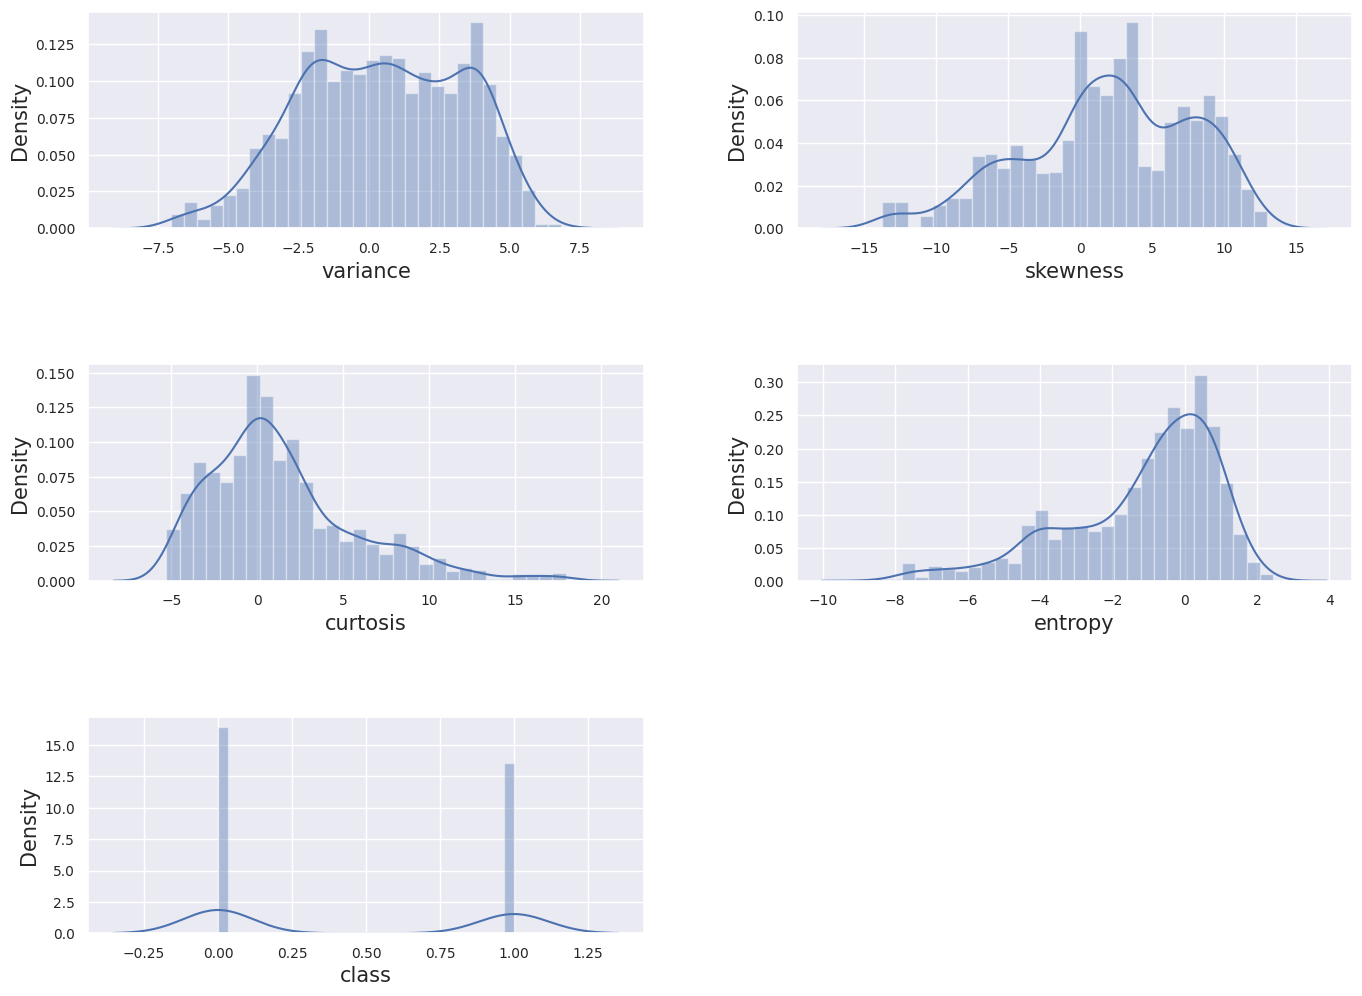

In [ ]:
sb.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":10,"ytick.labelsize":10,
            "legend.fontsize":8},style="darkgrid")
num_cols=df.select_dtypes(exclude="object").copy()
fig = plt.figure(figsize=(15,25),dpi=100)
for index,col in enumerate(df):
    plt.subplot(7,2,index+1)
    sb.distplot(df.loc[:,col].dropna(),kde=True,bins=30)
fig.tight_layout(pad=4.0)

From the above plot, we can make a conclusion that the data is not normalized because of instant peak in the distribution,plots of curtosis and entropy there may be some outliers.

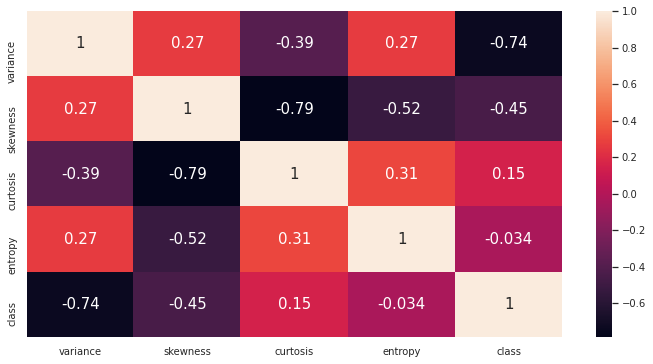

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,6))
sb.heatmap(corr,annot=True)

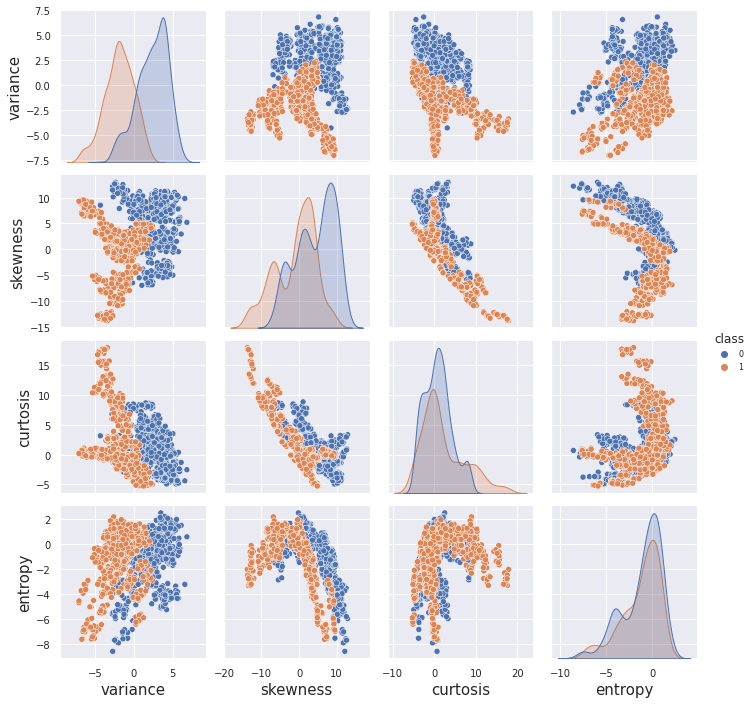

In [ ]:
sb.pairplot(data=df, hue='class')

From the above pair plot, we can draw some rudimentory conclusions.We can see that for variance and skewness, the difference between the two classes is quite visible,but not so much curtosis and entropy

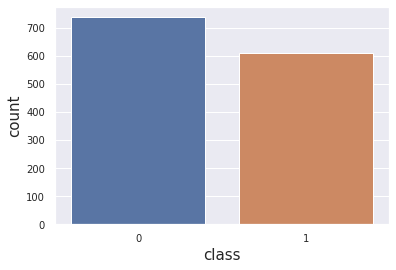

In [ ]:
sb.countplot(x='class', data= df)

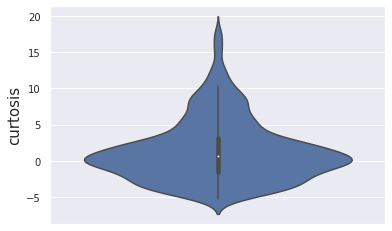

In [ ]:
sb.violinplot( y=df['curtosis'])

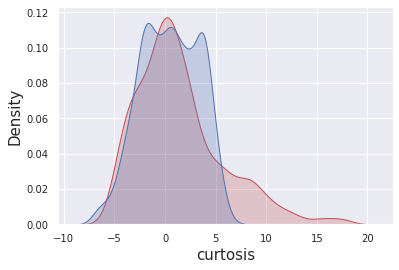

In [ ]:
p1=sb.kdeplot(df['curtosis'], shade=True, color="r")
p1=sb.kdeplot(df['variance'], shade=True, color="b")

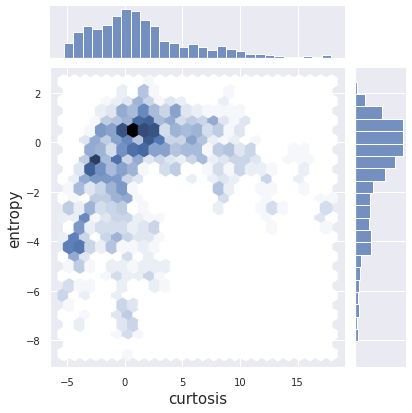

In [ ]:
sb.jointplot(x=df['curtosis'], y=df['entropy'], kind='hex', linewidth = 2)

## Checking outliers

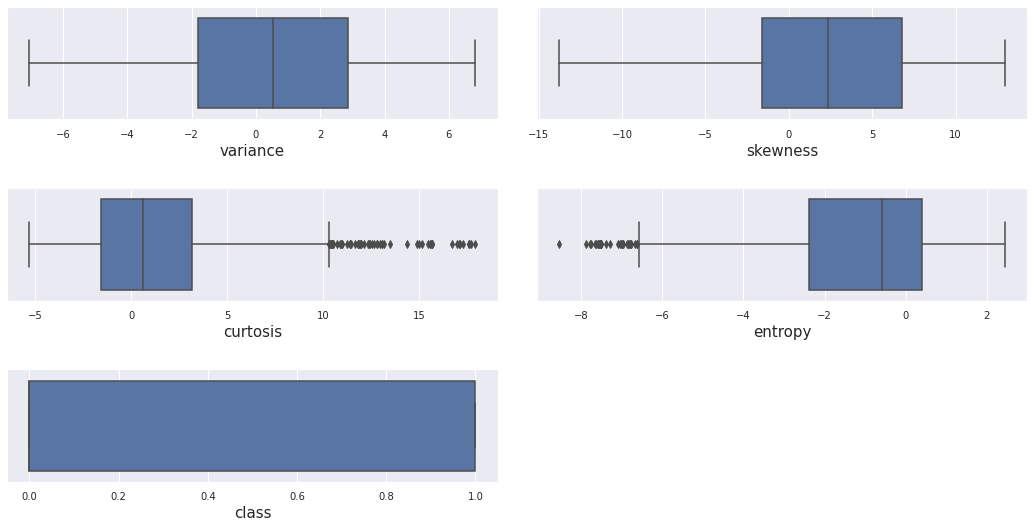

In [ ]:
plt.figure(figsize=(15,15))
for index,cols in enumerate(df):
    plt.subplot(6,2,index+1)
    sb.boxplot(df.loc[:,cols])
plt.tight_layout(pad=2)

Outliers are present in two columns


*   curtosis
*   entropy



## Treatment for Outliers

In [ ]:
print(df['curtosis'].quantile(0.10))
print(df['curtosis'].quantile(0.90))

-3.4332899999999995
7.930929999999998


In [ ]:
df["curtosis"] = np.where(df["curtosis"] <-3.4332899999999995, -3.4332899999999995,df['curtosis'])
df["curtosis"] = np.where(df["curtosis"] >7.930929999999998, 7.930929999999998,df['curtosis'])
print(df['curtosis'].skew())

0.5552407087728787


In [ ]:
print(df['entropy'].quantile(0.10))
print(df['entropy'].quantile(0.90))

-4.18969
0.96765


In [ ]:
df["entropy"] = np.where(df["entropy"] <-4.18969, -4.18969,df['entropy'])
df["entropy"] = np.where(df["entropy"] >0.96765, 0.96765,df['entropy'])
print(df['entropy'].skew())

-0.6192714573157776


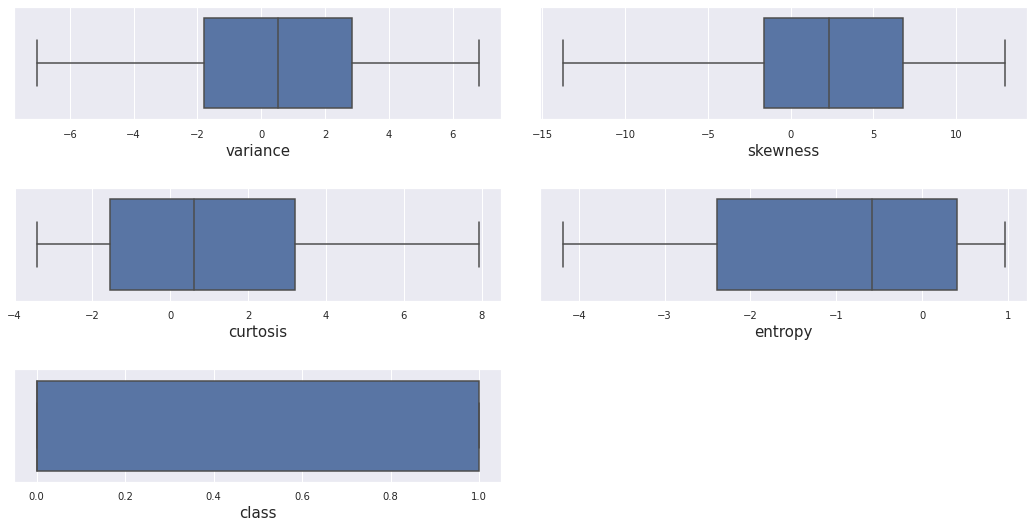

In [ ]:
plt.figure(figsize=(15,15))
for index,cols in enumerate(df):
    plt.subplot(6,2,index+1)
    sb.boxplot(df.loc[:,cols])
plt.tight_layout(pad=2)

After, Outlier Treatment there is no outlier present in data


## Splitting data

In [ ]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
X = X.astype('float32')


In [ ]:
# encode strings to integer
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

## Train and Test data

In [ ]:
# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# determine the number of input features
n_features = X.shape[1]

## Creating ANN Architecture

In [ ]:
# define model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(n_features,))) ## input layer
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu', input_shape=(n_features,)))  ##  hidden layer
model.add(Dropout(0.5)) 
model.add(Dense(1, activation='sigmoid')) ## output layer

## Summary

In [ ]:
## Describe Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


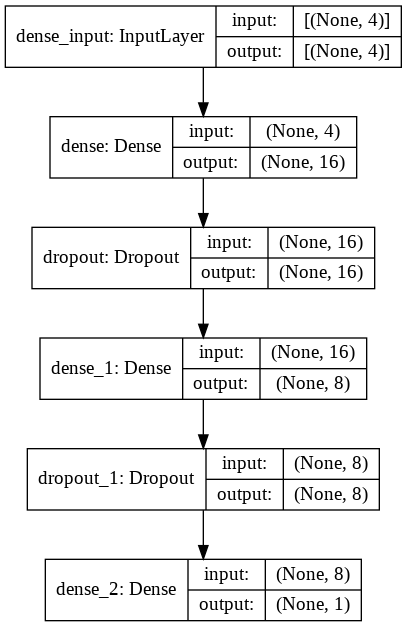

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='simple_cnn.png', show_shapes=True, show_layer_names=True)

## Optimizer

In [ ]:
# compile the model
#opt = Adam(learning_rate=0.0001)
model.compile(optimizer= "adam" , loss='binary_crossentropy',metrics=['accuracy'])

## Model Training

In [ ]:
# fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/50
29/29 [==============================] - 17s 23ms/step - loss: 1.0052 - accuracy: 0.5098 - val_loss: 0.5451 - val_accuracy: 0.8494
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 0.7501 - accuracy: 0.5853 - val_loss: 0.4420 - val_accuracy: 0.9056
Epoch 3/50
29/29 [==============================] - 0s 3ms/step - loss: 0.6500 - accuracy: 0.6423 - val_loss: 0.3840 - val_accuracy: 0.9146
Epoch 4/50
29/29 [==============================] - 0s 3ms/step - loss: 0.5644 - accuracy: 0.7055 - val_loss: 0.3390 - val_accuracy: 0.9348
Epoch 5/50
29/29 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.7226 - val_loss: 0.2908 - val_accuracy: 0.9551
Epoch 6/50
29/29 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.7683 - val_loss: 0.2577 - val_accuracy: 0.9573
Epoch 7/50
29/29 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.7914 - val_loss: 0.2287 - val_accuracy: 0.9596
Epoch 8/50
29/29 [

## Train and Test Accuracy

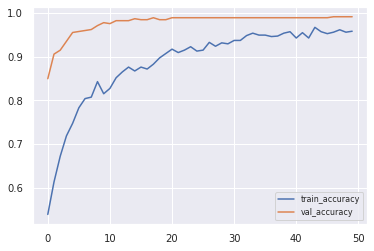

In [ ]:
## plotiing thr train and test accuracy
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

## Train and Test validation loss

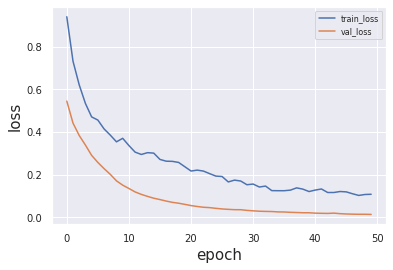

In [ ]:
## plottting train and test validation loss
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
history.history

{'accuracy': [0.5393133759498596,
  0.6135105490684509,
  0.672203779220581,
  0.7187153697013855,
  0.7475082874298096,
  0.7829457521438599,
  0.8039867281913757,
  0.8073089718818665,
  0.842746376991272,
  0.8150609135627747,
  0.8272425532341003,
  0.8516057729721069,
  0.8648948073387146,
  0.8759689927101135,
  0.8671096563339233,
  0.8759689927101135,
  0.871539294719696,
  0.8826135396957397,
  0.8970099687576294,
  0.9069767594337463,
  0.9169435501098633,
  0.9091916084289551,
  0.9147287011146545,
  0.9224806427955627,
  0.9125138521194458,
  0.9147287011146545,
  0.9324473738670349,
  0.9235880374908447,
  0.9313399791717529,
  0.9291251301765442,
  0.9368770718574524,
  0.9368770718574524,
  0.9479512572288513,
  0.9534883499145508,
  0.9490587115287781,
  0.9490587115287781,
  0.9457364082336426,
  0.9468438625335693,
  0.9534883499145508,
  0.9568106532096863,
  0.9424141645431519,
  0.9545958042144775,
  0.9424141645431519,
  0.9667773842811584,
  0.9568106532096863,
 

In [ ]:
weights=model.get_weights()
weights

[array([[ 0.4829061 ,  0.031946  ,  0.23485115,  0.37485662, -0.53993326,
         -0.40757462,  0.3982849 ,  0.5014219 ,  0.30566853, -0.2787509 ,
          0.22610073,  0.5403309 ,  0.25395006, -0.8335338 , -0.0233259 ,
         -0.5438805 ],
        [ 0.3439793 , -0.29454687, -0.30924076, -0.00642232, -0.28795758,
         -0.39679176,  0.2524931 ,  0.36869556,  0.21762446, -0.0220881 ,
          0.07936375,  0.45015687, -0.4932033 , -0.36231035,  0.25642583,
         -0.45410433],
        [ 0.555787  ,  0.24600655, -0.1651761 , -0.28944233,  0.15886283,
         -0.15926965,  0.3522358 ,  0.56040275,  0.38546568, -0.13103172,
          0.1278899 ,  0.63340163, -0.3206235 , -0.2101453 ,  0.22150272,
         -0.34058368],
        [-0.04457296, -0.10061913, -0.1825725 ,  0.13797839,  0.5918263 ,
          0.5980211 ,  0.24946114,  0.13915052, -0.09991402, -0.24621595,
         -0.14376716,  0.12523052,  0.10681944, -0.44460833,  0.00314567,
          0.7477142 ]], dtype=float32),
 ar

In [ ]:
weights, biases=model.layers[0].get_weights()
biases

array([-0.2644509 , -0.15212294, -0.2855952 ,  0.08049309, -0.02381727,
        0.00288419, -0.1127068 , -0.10119931, -0.1546216 ,  0.23459697,
       -0.19148672, -0.18592082, -0.05285405,  0.45655054, -0.21252902,
        0.58676   ], dtype=float32)

## Model Evaluation

In [ ]:
## evaluating the model
model.evaluate(X_test,y_test)

14/14 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9910


[0.014227494597434998, 0.9910112619400024]

In [ ]:
# predict test set
yhat = model.predict_classes(X_test)

In [ ]:
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.991


## Classification Report

In [ ]:
print(f"\033[1mTest Accuracy score : {round(accuracy_score(y_test, yhat)*100,5)} %\n")
print(f"F1_Score : {round(f1_score(y_test,yhat)*100,3)} %\n")
print(classification_report(y_test,yhat))

Test Accuracy score : 99.10112 %

F1_Score : 99.034 %

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       239
           1       0.99      1.00      0.99       206

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445



In the Test data,the accuracy is 99.1 % and F1 Score is 99%

In [ ]:
train_pd = model.predict(X_train)
train_pd[:5]
train_pred = []
for element in train_pd:
    if element > 0.5:
        train_pred.append(1)
    else:
        train_pred.append(0)
print(f"\033[1mTrain Accuracy score : {round(accuracy_score(y_train, train_pred)*100,5)} %\n")
print(f"F1_Score : {round(f1_score(y_train,train_pred)*100,3)} %\n")
print(classification_report(y_train,train_pred))

Train Accuracy score : 99.77852 %

F1_Score : 99.752 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       404

    accuracy                           1.00       903
   macro avg       1.00      1.00      1.00       903
weighted avg       1.00      1.00      1.00       903



In the Train data,the accuracy is 99.7 % and F1_Score is 99.7% 

## Loss vs Epochs

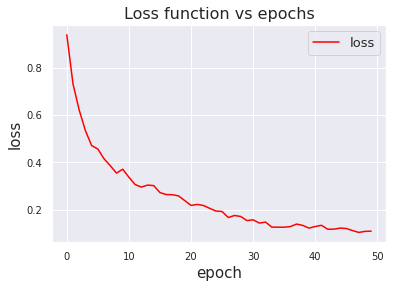

In [ ]:
plt.plot(history.history['loss'], c='red')
plt.title('Loss function vs epochs',fontsize=16)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss'],loc='upper right',fontsize=13)
plt.show()

In [ ]:
model.predict_classes([[-1.38870, -4.87730,	6.4774,	0.34179]])

array([[1]], dtype=int32)